## Preamble 

In [1]:
import sys
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load
from analyse import Analyse
from pyutils.pyplot import Plot
from pyutils.pyselect import Select
from pyutils.pyvector import Vector
from pyutils.pyprint import Print

import awkward as ak
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Load data

In [2]:
ana_label = "dev_CRY_mix2BB_onspill-LH_aw_noCRV"
data = Load(in_path = f"../../output/results/{ana_label}").load_pkl() 
events = data["events"]

[Load] ✅ Initialised with out_path=../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV
[Load] ✅ Successfully loaded results from ../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV/results.pkl


In [3]:
display(data["cut_flow"])
# printer.print_n_events(data["events"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2054807,95.106,96.628,Electron track fits
3,one_reco_electron,Preselect,1479584,68.482,72.006,One reco electron / event
4,is_downstream,Preselect,825787,38.221,55.812,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,258271,11.954,31.276,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,182914,8.466,70.823,Track fit quality > 0.2
7,within_t0,Tracker,149420,6.916,81.689,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,140902,6.522,94.299,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,139272,6.446,98.843,>20 active tracker hits


In [4]:
printer = Print()
printer.print_n_events(events, 1)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 334
evt.event: 171805
crv.crvcoincs.time: [1.13e+03]
crv.crvcoincs.timeStart: [1.15e+03]
crv.crvcoincs.timeEnd: [1.24e+03]
crv.crvcoincs.nHits: [20]
crv.crvcoincs.pos.fCoordinates.fZ: [-3.72e+03]
mom_mag: [[111, 111, 111, 111, 110, 111, 110, ..., 111, 111, 111, 111, 111, 111], ...]
dev.at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
dev.has_trk_front: [True, True, True, True]
dev.is_reco_electron: [True, False, False, False]
dev.one_reco_electron: [True, True, True, True]
dev.one_reco_electron_per_event: True
dev.is_downstream: [True, False, True, False]
dev.has_trk_parent_electron: [True, True, True, True]
dev.good_trkqual: [True, True, True, False]
dev.within_t0: [True, True, True, True]
dev.within_t0err: [True, False, True, Fa

In [5]:
# should be 1 / coincidence 
events["dev"]["dT"]

<Array [[23.2], [565, ..., 51.9], ..., [92.7]] type='16981 * var * float64'>

## Sanity check 

does the number of dTs = number of coincidences?

In [6]:
nums_1 = ak.num(events["dev"]["dT"], axis=-1)
nums_2 = ak.num(events["crv"]["crvcoincs.time"], axis=-1)

In [7]:
if ak.all(nums_1, axis=-1) != ak.all(nums_2, axis=-1):
    print("❌ Oh no")
else:
    print(nums_1)
    print(nums_2)
    print("✅ One coincidece per dT")

[1, 3, 2, 1, 3, 3, 1, 1, 1, 9, 1, 6, ..., 1, 4, 4, 5, 1, 1, 1, 2, 12, 1, 6, 1]
[1, 3, 2, 1, 3, 3, 1, 1, 1, 9, 1, 6, ..., 1, 4, 4, 5, 1, 1, 1, 2, 12, 1, 6, 1]
✅ One coincidece per dT


In [8]:
# events["dev"]["min_dT"]

In [9]:
# at_trk_front = selector.select_surface(test["trkfit"], "TT_Front")
# test["trkfit"] = test["trkfit"][at_trk_front]

In [10]:
# print(unvetoed)

In [11]:
# events.fields

In [12]:
# printer.print_n_events(events, 1)

In [13]:
# all my masks
# printer.print_n_events(events["dev"], 1)

Does the number of minimum/central dT values, including None values, align with the number of events? 

In [14]:
def check_counts(arr, field="cent_dT"):

    n_events = len(arr)
    n_min_dT = len(ak.flatten(arr["dev"][field], axis=None))
    n_min_dT_none = ak.sum(ak.is_none(arr["dev"][field], axis=-1), axis=None)
    
    print(
        f"Field:                    {field}\n" 
        f"Total events:           {n_events:>8,}\n"
        f"Min dT (non-None):      {n_min_dT:>8,}\n"
        f"Min dT (None):          {n_min_dT_none:>8,}\n"
        f"Sum:                    {n_min_dT + n_min_dT_none:>8,}\n"
        f"{'✅ All accounted for\n' if n_events == n_min_dT + n_min_dT_none else '❌ Mismatch!\n'}"
    )

check_counts(events, field="cent_dT")
check_counts(events, field="min_dT")

Field:                    cent_dT
Total events:             16,981
Min dT (non-None):        16,957
Min dT (None):                24
Sum:                      16,981
✅ All accounted for

Field:                    min_dT
Total events:             16,981
Min dT (non-None):        16,957
Min dT (None):                24
Sum:                      16,981
✅ All accounted for



## Plot 

In [15]:
plotter = Plot()
out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


## Full dT 

This is all the possible dT combinations. 

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


/tmp/ipykernel_202401/3509178174.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, ax[2].get_ylim()[1] * (2))


	Wrote ../../output/images/comp/dT/h1_1x3_dT.png


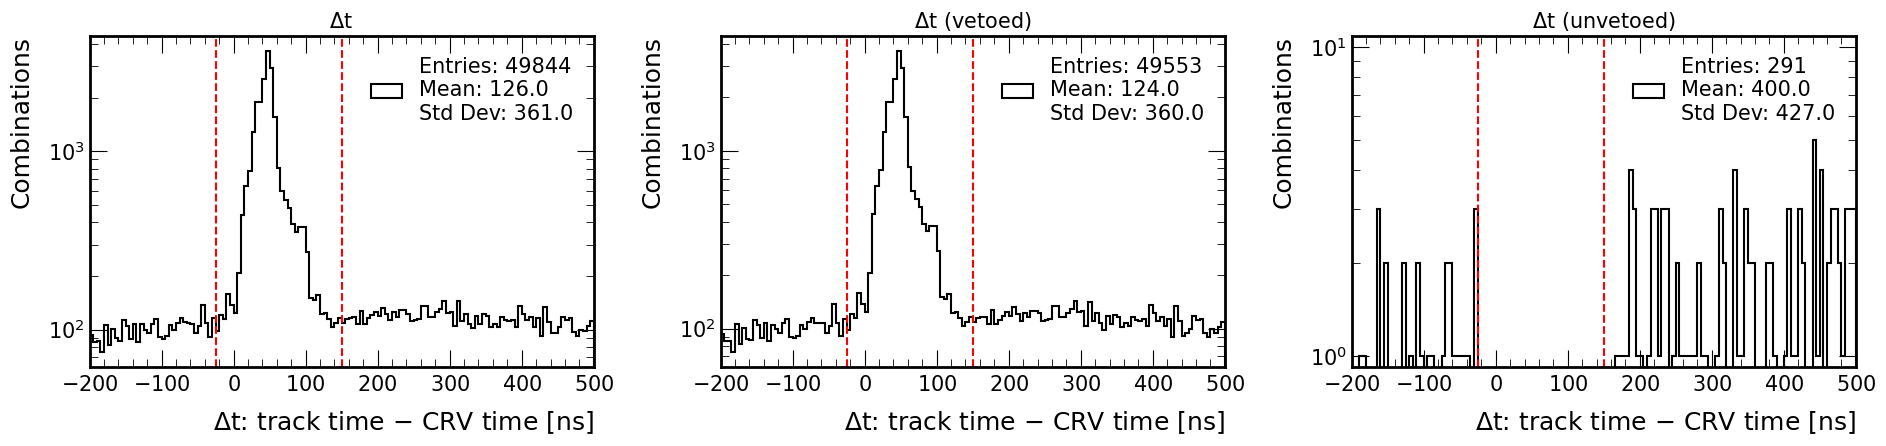

In [16]:
plotter = Plot()

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 1*4.8))

plotter.plot_1D( 
    ak.flatten(events["dev"]["dT"], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"$\Delta t$ ",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(events["dev"]["dT"][events["dev"]["vetoed"]], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"$\Delta t$ (vetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(events["dev"]["dT"][events["dev"]["unvetoed"]], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"$\Delta t$ (unvetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[2],
    log_y=True
)

for i_ax, subplot in enumerate(ax):
    
    subplot.axvline(-25, linestyle="--", color="red")
    subplot.axvline(150, linestyle="--", color="red")

ax[2].set_ylim(0, ax[2].get_ylim()[1] * (2))

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x3_dT.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## Minimum dT 

The dT combination / event that is closest to zero. Does not not necessarily correspond to the dT which is used in the veto. 

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


/tmp/ipykernel_202401/334698624.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, ax[2].get_ylim()[1] * (2))


	Wrote ../../output/images/comp/dT/h1_1x3_min_dT.png


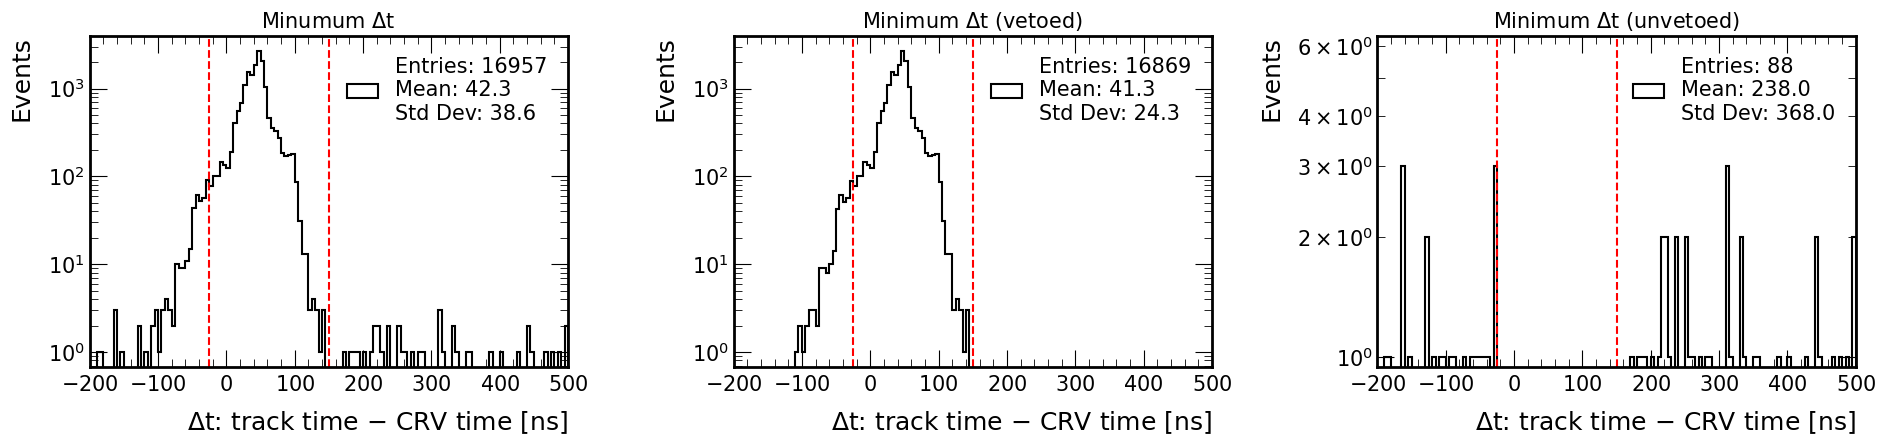

In [17]:
plotter = Plot()

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 1*4.8))

plotter.plot_1D( 
    ak.flatten(events["dev"]["min_dT"], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Minumum $\Delta t$ ",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(events["dev"]["min_dT"][events["dev"]["vetoed"]], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ (vetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(events["dev"]["min_dT"][events["dev"]["unvetoed"]], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ (unvetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[2],
    log_y=True
)

for i_ax, subplot in enumerate(ax):
    
    subplot.axvline(-25, linestyle="--", color="red")
    subplot.axvline(150, linestyle="--", color="red")

ax[2].set_ylim(0, ax[2].get_ylim()[1] * (2))

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x3_min_dT.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## Central dT 

This is the dT closest to the midpoint of the dT window, so is most likely to have been used in the veto. Not that I do not actually know which coincidence was used, since I used ak.any. 

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


/tmp/ipykernel_202401/3168563536.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, ax[2].get_ylim()[1] * (2))


	Wrote ../../output/images/comp/dT/h1_1x3_cent_dT.png


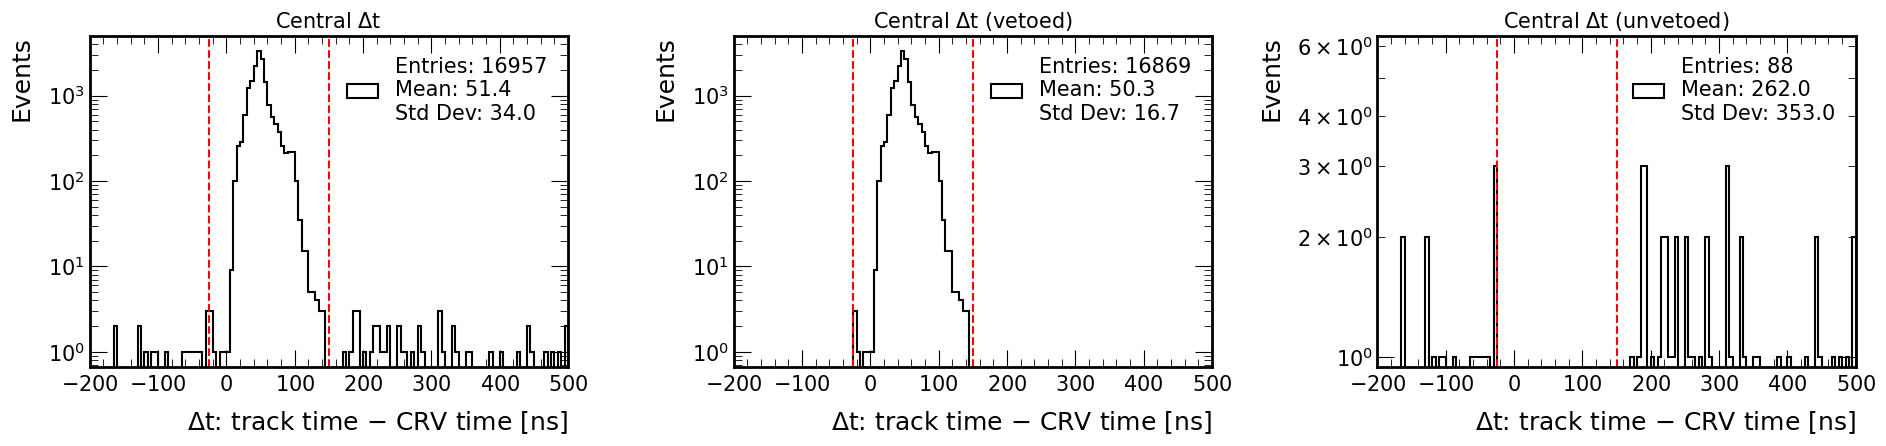

In [18]:
plotter = Plot()

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 1*4.8))

plotter.plot_1D( 
    ak.flatten(events["dev"]["cent_dT"], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Central $\Delta t$ ",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(events["dev"]["cent_dT"][events["dev"]["vetoed"]], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Central $\Delta t$ (vetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(events["dev"]["cent_dT"][events["dev"]["unvetoed"]], axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Central $\Delta t$ (unvetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[2],
    log_y=True
)

for i_ax, subplot in enumerate(ax):
    
    subplot.axvline(-25, linestyle="--", color="red")
    subplot.axvline(150, linestyle="--", color="red")

ax[2].set_ylim(0, ax[2].get_ylim()[1] * (2))

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x3_cent_dT.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## Correlation with momentum 

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


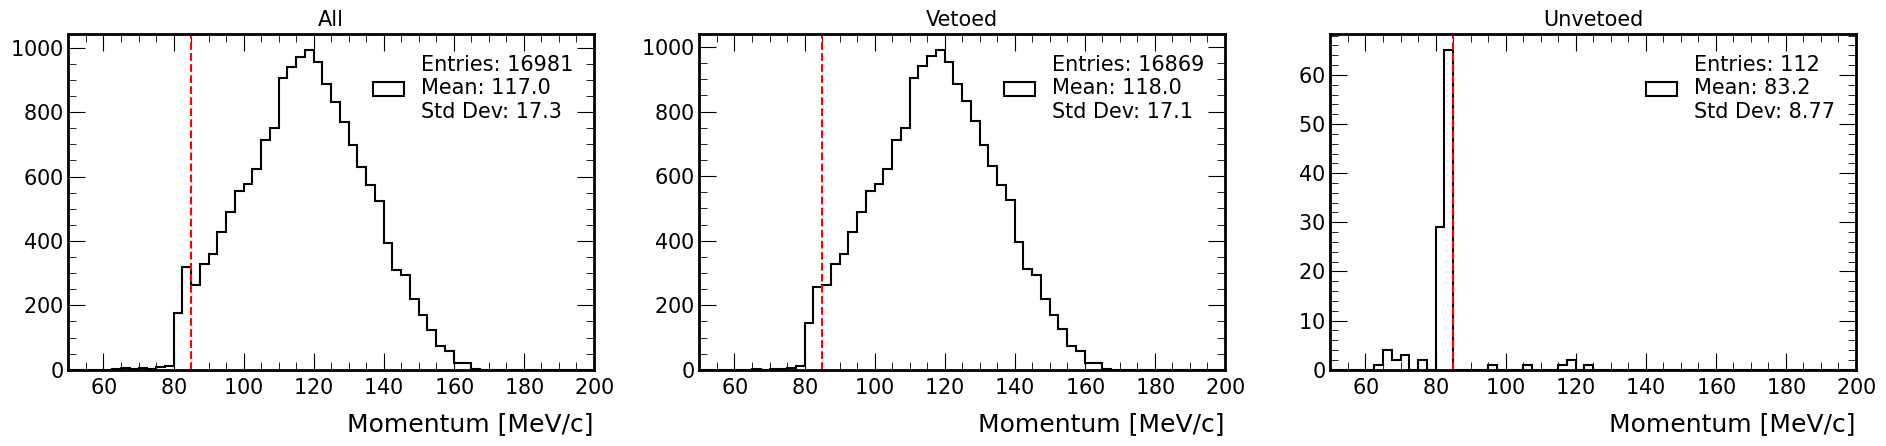

Wrote ../../output/images/comp/dT/h1_1x3_mom.png


In [48]:
at_trk_ent = Select().select_surface(events["trkfit"], "TT_Front")
trkfit = events["trkfit"][at_trk_ent]
mom_mag = Vector().get_mag(trkfit["trksegs"], "mom")

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 4.8))
    
plotter.plot_1D( 
    ak.flatten(mom_mag, axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    show=False,
    ax=ax[0],
    title="All",
    xlabel=r"Momentum [MeV/c]",
    log_y=False,
)

plotter.plot_1D( 
    ak.flatten(mom_mag[events["dev"]["vetoed"]], axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    show=False,
    ax=ax[1],
    title="Vetoed",
    xlabel=r"Momentum [MeV/c]",
    log_y=False,
)

plotter.plot_1D( 
    ak.flatten(mom_mag[events["dev"]["unvetoed"]], axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    show=False,
    ax=ax[2],
    title="Unvetoed",
    xlabel=r"Momentum [MeV/c]",
    log_y=False,
)

plt.tight_layout()
ax[0].axvline(85, linestyle="--", color="red")
ax[1].axvline(85, linestyle="--", color="red")
ax[2].axvline(85, linestyle="--", color="red")
out_file_name = f"{out_path}/h1_1x3_mom.png"
plt.savefig(out_file_name, dpi=300)
plt.show()
print(f"Wrote {out_file_name}")


In [20]:
print(16981-16869)

112


[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude
cent_dT length: 16957
cent_dT_valid length: 16957
mom_mag_valid length: 16957


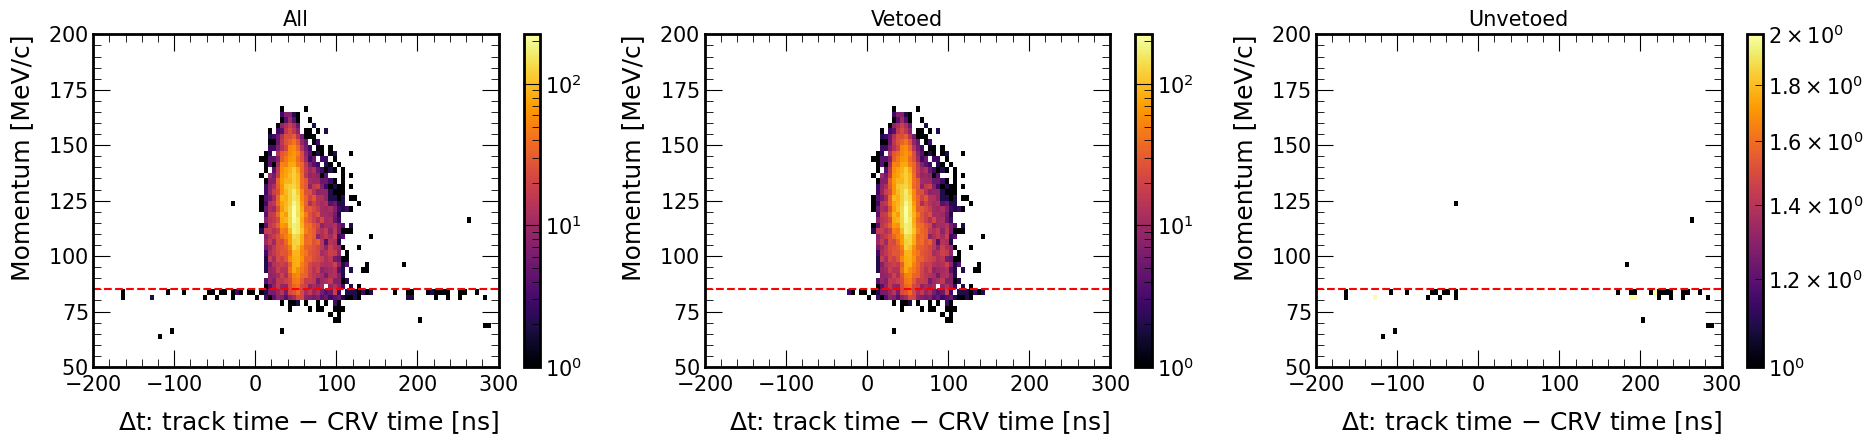

Wrote ../../output/images/comp/dT/h2_1x3_mom_vs_dt.png


In [46]:
at_trk_ent = Select().select_surface(events["trkfit"], "TT_Front")
trkfit = events["trkfit"][at_trk_ent]
mom_mag = Vector().get_mag(trkfit["trksegs"], "mom")

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 4.8))

# Mask out events where cent_dT is empty BEFORE flattening
cent_dT = events["dev"]["cent_dT"]
has_dT = ak.any(events["dev"]["cent_dT"], axis=-1)
# Apply this mask to everything
# Use ak.mask to preserve structure 
cent_dT_valid = ak.mask(events["dev"]["cent_dT"], has_dT)
mom_mag_valid = ak.mask(mom_mag, has_dT)

print(f"cent_dT length: {len(ak.flatten(cent_dT, axis=None))}")
print(f"cent_dT_valid length: {len(ak.flatten(cent_dT_valid, axis=None))}")
print(f"mom_mag_valid length: {len(ak.flatten(mom_mag_valid, axis=None))}")
# print(f"cent_dT length: {len(ak.flatten(mom_mag_valid, axis=None))}")

vetoed_valid = events["dev"]["vetoed"][has_dT]
unvetoed_valid = events["dev"]["unvetoed"][has_dT]
    
plotter.plot_2D( 
    x=ak.flatten(cent_dT_valid, axis=None),
    y=ak.flatten(mom_mag_valid, axis=None),
    nbins_x=100,
    xmin=-200, 
    xmax=300,
    nbins_y=60,
    ymin=50, 
    ymax=200,
    # vmax=2,
    show=False,
    ax=ax[0],
    title="All",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    log_z=True,
)

# im = ax[0].collections[0]
# im.set_clim(vmin=10, vmax=100)
# plt.colorbar(im, ax=ax[0])


plotter.plot_2D( 
    x=ak.flatten(cent_dT_valid[events["dev"]["vetoed"]], axis=None),
    y=ak.flatten(mom_mag_valid[events["dev"]["vetoed"]], axis=None),
    nbins_x=100,
    xmin=-200, 
    xmax=300,
    nbins_y=60,
    ymin=50, 
    ymax=200,
    # vmax=2,
    show=False,
    ax=ax[1],
    title="Vetoed",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    log_z=True,
)

plotter.plot_2D( 
    x=ak.flatten(cent_dT_valid[events["dev"]["unvetoed"]], axis=None),
    y=ak.flatten(mom_mag_valid[events["dev"]["unvetoed"]], axis=None),
    nbins_x=100,
    xmin=-200, 
    xmax=300,
    nbins_y=60,
    ymin=50, 
    ymax=200,
    show=False,
    ax=ax[2],
    title="Unvetoed",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    log_z=True,
)

plt.tight_layout()
ax[0].axhline(85, linestyle="--", color="red")
ax[1].axhline(85, linestyle="--", color="red")
ax[2].axhline(85, linestyle="--", color="red")
out_file_name = f"{out_path}/h2_1x3_mom_vs_dt.png"
plt.savefig(out_file_name, dpi=300)
plt.show()



print(f"Wrote {out_file_name}")


something funny going on with the scale I think 

In [47]:
# Before your plot_2D calls, check the lengths:
print(f"cent_dT length: {len(ak.flatten(events['dev']['cent_dT'], axis=None))}")
print(f"mom_mag length: {len(ak.flatten(mom_mag, axis=None))}")

print(f"cent_dT[vetoed] length: {len(ak.flatten(events['dev']['cent_dT'][events['dev']['vetoed']], axis=None))}")
print(f"mom_mag[vetoed] length: {len(ak.flatten(mom_mag[events['dev']['vetoed']], axis=None))}")

print(f"cent_dT[unvetoed] length: {len(ak.flatten(events['dev']['cent_dT'][events['dev']['unvetoed']], axis=None))}")
print(f"mom_mag[unvetoed] length: {len(ak.flatten(mom_mag[events['dev']['unvetoed']], axis=None))}")

cent_dT length: 16957
mom_mag length: 16981
cent_dT[vetoed] length: 16869
mom_mag[vetoed] length: 16869
cent_dT[unvetoed] length: 88
mom_mag[unvetoed] length: 112


In [26]:
# Check this
print(f"Total events: {len(events['dev']['cent_dT'])}")
print(f"Vetoed events: {ak.sum(events['dev']['vetoed'])}")
print(f"Unvetoed events: {ak.sum(events['dev']['unvetoed'])}")
print(f"Vetoed + Unvetoed = {ak.sum(events['dev']['vetoed']) + ak.sum(events['dev']['unvetoed'])}")

Total events: 16981
Vetoed events: 16869
Unvetoed events: 112
Vetoed + Unvetoed = 16981


### dT with momentum cut 

Use within_wide_window + select

In [49]:
mom_condition = ak.any((events["dev"]["within_wide_win"] & events["dev"]["select"]), axis=-1)
# print(mom_condition)
selected_events = events[mom_condition]

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


/tmp/ipykernel_202401/1537178366.py:62: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, ax[2].get_ylim()[1] * (1+0.5))


	Wrote ../../output/images/comp/dT/h1_1x3_dT_select.png


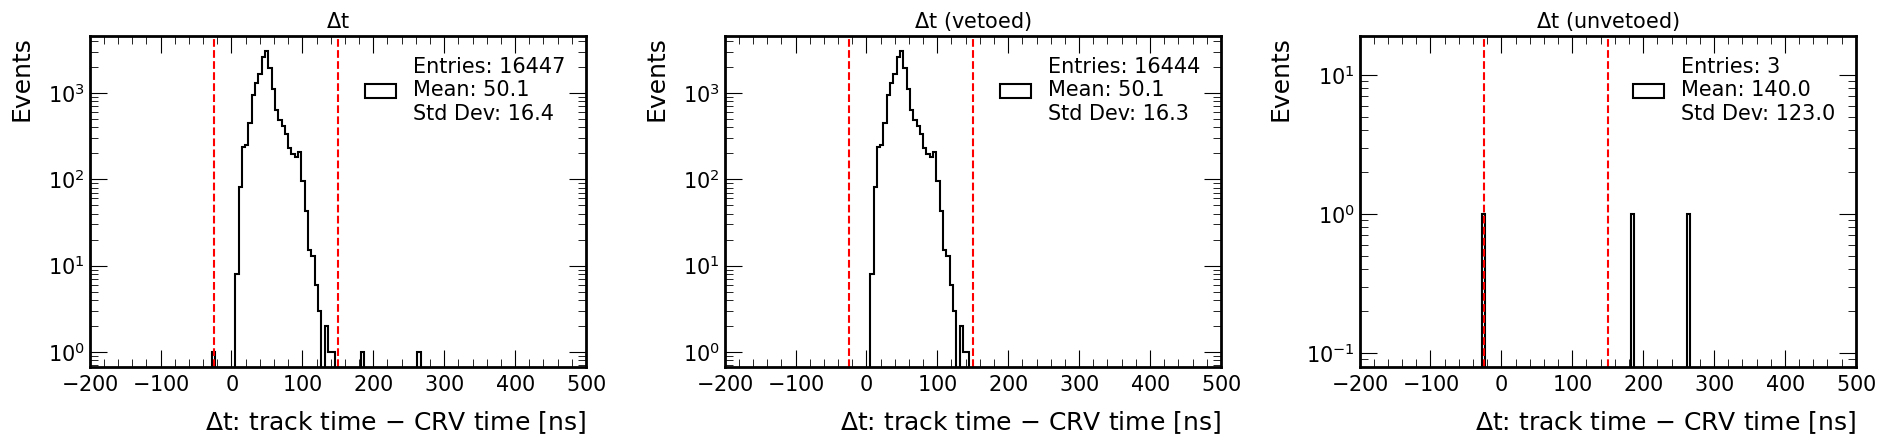

In [52]:
plotter = Plot()

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 1*4.8))

# Arrays
cent_dT = selected_events["dev"]["cent_dT"]
cent_dT_vetoed = selected_events["dev"]["cent_dT"][selected_events["dev"]["vetoed"]]
cent_dT_unvetoed = selected_events["dev"]["cent_dT"][selected_events["dev"]["unvetoed"]]

plotter.plot_1D( 
    ak.flatten(cent_dT, axis=None),
    nbins=150,
    xmin=-200, 
    xmax=500,
    title=r"$\Delta t$ ",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(cent_dT_vetoed, axis=None),
    nbins=150,
    xmin=-200, 
    xmax=500,
    title=r"$\Delta t$ (vetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

plotter.plot_1D(
    ak.flatten(cent_dT_unvetoed, axis=None),
    nbins=150,
    xmin=-200, 
    xmax=500,
    title=r"$\Delta t$ (unvetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Events",
    show=False,
    col="black",
    ax=ax[2],
    log_y=True
)

# for j_ax, row in enumerate(ax):
#     for i_ax, subplot in enumerate(row):
#         subplot.set_ylim(0, subplot.get_ylim()[1] * (1+0.7))
for i_ax, subplot in enumerate(ax):
    
    subplot.axvline(-25, linestyle="--", color="red")
    subplot.axvline(150, linestyle="--", color="red")


# ax[0,2].set_ylim(0, ax[0,2].get_ylim()[1] * (1+0.75))
ax[2].set_ylim(0, ax[2].get_ylim()[1] * (1+0.5))

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x3_dT_select.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## ~80 MeV/c bump?

In [58]:
selector = Select()
mom_condition = ak.flatten(ak.flatten((mom_mag < 85) & (mom_mag > 80), axis=-1), axis=-1)
bump_events = events[mom_condition & events["dev"]["unvetoed"]]

at_trk_ent = selector.select_surface(bump_events["trkfit"], "TT_Front")
trkfit = bump_events["trkfit"][at_trk_ent]
mom_mag = Vector().get_mag(bump_events["trkfit"]["trksegs"], "mom") 

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


In [53]:



# plotter.plot_1D( 
#     ak.flatten(mom_mag, axis=None),
#     nbins=60,
#     xmin=50, 
#     xmax=200,
#     show=True,
#     xlabel=r"Tracks",
#     ylabel=r"Momentum [MeV/c]"
# )

# # Need to think of some physics parameters here 
# # I guess it's just pileup, but what does that mean? 
# # Couldit be start/end time 

# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# plotter.plot_1D( 
#     ak.flatten(bump_events["crv"]["crvcoincs.timeStart"], axis=None),
#     nbins=200,
#     xmin=0, 
#     xmax=2000,
#     show=False,
#     xlabel=r"Start time [ns]",
#     ylabel=r"Coincidences",
#     ax=ax[0]
# )

# plotter.plot_1D( 
#     ak.flatten(bump_events["crv"]["crvcoincs.timeEnd"], axis=None),
#     nbins=200,
#     xmin=0, 
#     xmax=2000,
#     show=False,
#     xlabel=r"End time [ns]",
#     ylabel=r"Coincidences",
#     ax=ax[1]
# )

# plt.tight_layout()
# out_file_name = f"{out_path}/h1_1x2_start_end_time_bump.png"
# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()


# # z-position 
# # something else? 
# # 

# # plotter.plot_1D( 
# #     ak.flatten(bump_events["crv"]["crvcoincs.pos"], axis=None),
# #     nbins=250,
# #     xmin=0, 
# #     xmax=2500,
# #     show=True,
# #     xlabel=r"Tracks",
# #     ylabel=r"Momentum [MeV/c]"
# # )

# # plotter.plot_1D( 
# #     ak.flatten(bump, axis=None),
# #     nbins=60,
# #     xmin=50, 
# #     xmax=200,
# #     show=True,
# #     xlabel=r"Tracks",
# #     ylabel=r"Momentum [MeV/c]"
# # )


# # plotter.plot_1D( 
# #     ak.flatten(bump_events["trk, axis=None),
# #     nbins=60,
# #     xmin=50, 
# #     xmax=200,
# #     show=True,
# #     xlabel=r"Tracks",
# #     ylabel=r"Momentum [MeV/c]"
# # )


# # printer.print_n_events(bump_events)
# # Do they pass quality? 

# # bump_events = events[events["dev"]["unvetoed"]]

In [55]:
# start_time_cond = ((events["crv"]["crvcoincs.timeStart"] > 450) & (events["crv"]["crvcoincs.timeStart"] < 1550))
# end_time_cond = (events["crv"]["crvcoincs.timeEnd"] < 1690)
# start_end_time_cond = (start_time_cond & end_time_cond)

# condition = ak.all(start_end_time_cond, axis=-1)
# tmp = events[condition]

# # mom_condition = ak.flatten(ak.flatten((mom_mag < 85) & (mom_mag > 80), axis=-1), axis=-1)
# # bump_events = events[mom_condition & events["dev"]["unvetoed"]]

# at_trk_ent = selector.select_surface(tmp["trkfit"], "TT_Front")
# trkfit = tmp["trkfit"][at_trk_ent]
# mom_mag_tmp = Vector().get_mag(tmp["trkfit"]["trksegs"], "mom") 

# # plotter.plot_1D( 
# #     ak.flatten(mom_mag_tmp, axis=None),
# #     nbins=60,
# #     xmin=50, 
# #     xmax=200,
# #     show=True,
# #     xlabel=r"Tracks",
# #     ylabel=r"Momentum [MeV/c]"
# # )

# fig, ax = plt.subplots(1,2,figsize=(2*6.4, 4.8))
    
# plotter.plot_1D( 
#     ak.flatten(mom_mag_tmp[tmp["dev"]["vetoed"]], axis=None),
#     nbins=60,
#     xmin=50, 
#     xmax=200,
#     show=False,
#     ax=ax[0],
#     title="Vetoed",
#     ylabel=r"Tracks",
#     xlabel=r"Momentum [MeV/c]",
#     # log_z=True,
#     # show=True
# )

# plotter.plot_1D( 

#     ak.flatten(mom_mag_tmp[tmp["dev"]["unvetoed"]], axis=None),
#     nbins=60,
#     xmin=50, 
#     xmax=200,
#     show=False,
#     ax=ax[1],
#     title="Unvetoed",
#     xlabel=r"Tracks",
#     ylabel=r"Momentum [MeV/c]",
#     # log_z=True,
#     # show=True
# )


# plt.tight_layout()
# ax[0].axvline(85, linestyle="--", color="red")
# ax[1].axvline(85, linestyle="--", color="red")
# out_file_name = f"{out_path}/h1_1x2_mom_start_end_cut.png"
# plt.savefig(out_file_name, dpi=300)
# plt.show()
# print(f"Wrote {out_file_name}")



# # printer.print_n_events(bump_events, 10)

In [59]:
printer.print_n_events(bump_events["evt"][bump_events["dev"]["unvetoed"]], 10)

[pyprint] ⭐️ Printing 10 event(s)...

-------------------------------------------------------------------------------------
run: 1202
subrun: 2413
event: 396816
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
run: 1202
subrun: 2950
event: 470264
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
run: 1202
subrun: 3522
event: 19933
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
run: 1202
subrun: 3710
event: 247781
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
run: 1202
subrun: 5610
event: 5316
--

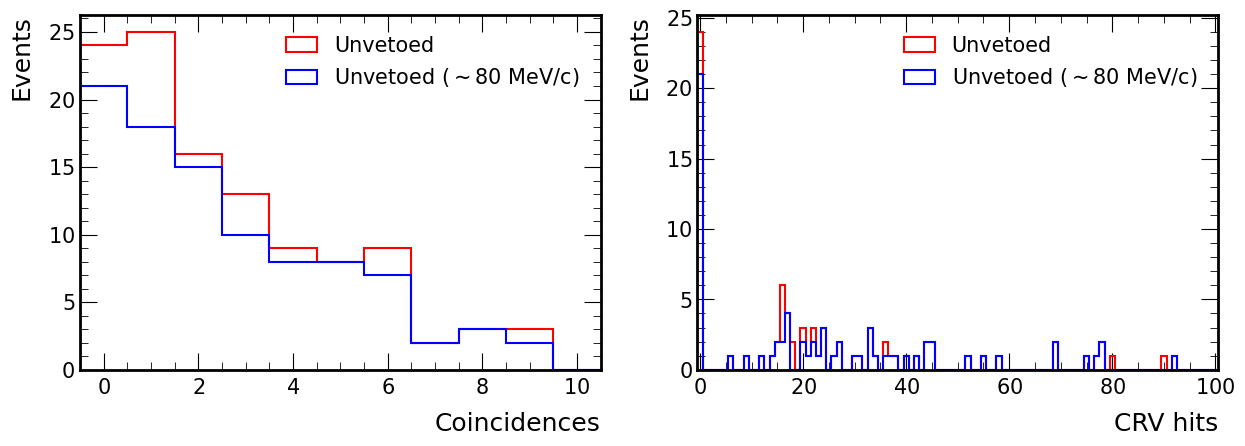

Wrote ../../output/images/comp/dT/h1_1x2_showers.png
[1, 7, 1, 1, 1, 0, 0, 4, 3, 4, 8, 6, 2, ..., 0, 1, 1, 6, 2, 0, 0, 3, 6, 0, 0, 6]
[20, 2245, 24, 17, 12, 0, 0, 55, 36, ..., 2224, 69, 0, 0, 36, 1826, 0, 0, 78]


In [60]:
# From event displays these look like showers 

n_coinc_per_event = ak.num(bump_events["crv"]["crvcoincs.nHits"], axis=-1)
n_hits_per_event = ak.sum(bump_events["crv"]["crvcoincs.nHits"], axis=-1)

n_coinc_per_event = ak.num(events["crv"]["crvcoincs.nHits"][events["dev"]["unvetoed"]], axis=-1)
n_hits_per_event = ak.sum(events["crv"]["crvcoincs.nHits"][events["dev"]["unvetoed"]], axis=-1)


fig, ax = plt.subplots(1,2,figsize=(2*6.4, 4.8))
    
plotter.plot_1D_overlay( 
    {
        "Unvetoed" : ak.num(events["crv"]["crvcoincs.nHits"][events["dev"]["unvetoed"]], axis=-1),
        r"Unvetoed ($\sim80$ MeV/c)" : ak.num(bump_events["crv"]["crvcoincs.nHits"], axis=-1), 
    },
    nbins=11,
    xmin=-0.5, 
    xmax=10.5,
    show=False,
    ax=ax[0],
    ylabel=r"Events",
    xlabel=r"Coincidences",
    # log_z=True,
    # show=True
)

plotter.plot_1D_overlay( 
    {
        "Unvetoed" : ak.sum(events["crv"]["crvcoincs.nHits"][events["dev"]["unvetoed"]], axis=-1),
        r"Unvetoed ($\sim80$ MeV/c)" : ak.sum(bump_events["crv"]["crvcoincs.nHits"], axis=-1), 
    },
    nbins=101,
    xmin=-0.5, 
    xmax=100.5,
    show=False,
    ax=ax[1],
    ylabel=r"Events",
    xlabel=r"CRV hits",
    # log_z=True,
    # show=True
)

plt.tight_layout()

out_file_name = f"{out_path}/h1_1x2_showers.png"
plt.savefig(out_file_name, dpi=300)
plt.show()
print(f"Wrote {out_file_name}")

print(n_coinc_per_event)
print(n_hits_per_event)


## Print unvetoed dTs: sanity check 

In [62]:
unvetoed_selected_events = selected_events[selected_events["dev"]["unvetoed"]]
print(len(unvetoed_selected_events), "(we expect 6)")

6 (we expect 6)


In [63]:
printer.print_n_events(unvetoed_selected_events["dev"], len(unvetoed_selected_events))

[pyprint] ⭐️ Printing 6 event(s)...

-------------------------------------------------------------------------------------
at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
has_trk_parent_electron: [True, True, True, True]
good_trkqual: [True, True, True, False]
within_t0: [True, True, True, True]
within_t0err: [True, False, False, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.895, 0.765, 0.551, 0.55, 0.549, ..., 0.979, 0.239, 0.549, 0.552], ...]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_lhr_max_lo: [True, True, True, True]
within_lhr_max_hi: [True, True, True, True]
veto_condition: []
vetoed: False
unvetoed: True
trk_times: [[1.45e+0